In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
boston = pd.read_csv("Boston.csv") #creating a dataframe
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
import os
os.getcwd()

'C:\\Users\\naikt\\Downloads'

In [3]:
boston.info() #get the structure of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
boston=boston.drop(columns='Unnamed: 0') #to remove unwanted cols we use drop() Fn

In [5]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
#creating new data frame
boston_x = pd.DataFrame(boston.iloc[:,:13])
#iloc Fn means ____ ; before ',' means all rows :: after ',' :13 means cols till 13 i.e: 0to12

In [7]:
#creating new data frame
boston_y  =pd.DataFrame(boston.iloc[:,-1])
#before ',' means all rows :: after ',' -1 means only last col

In [8]:
#train-test split
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(boston_x,boston_y,test_size = 0.3)
#size is the % of test data

In [10]:
print("xtrain shape",X_train.shape) #.shape gives no of cols and rows X->dependent , Y->independent
print("ytrain shape",Y_train.shape)
print("xtest shape",X_test.shape)
print("ytest shape",Y_test.shape) #actual value

xtrain shape (354, 13)
ytrain shape (354, 1)
xtest shape (152, 13)
ytest shape (152, 1)


In [11]:
#Creating LR
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

#testing by passing X_test and predicting Y_test
Y_pred_linear = regression.predict(X_test) #getting the predicted Y value with the help of X_test
#Y_pred_linear is Predicted Value
#will have to convert it to data frame

In [12]:
Y_pred_df = pd.DataFrame(Y_pred_linear,columns=["predicted"]) #creating df of predicted Y 
Y_pred_df.head()

,predicted
0,24.095539
1,21.749410
2,22.282602
3,29.928872
4,17.352377


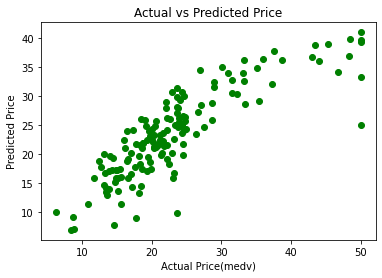

In [13]:
plt.scatter(Y_test,Y_pred_linear,c="green") #scatter plot of both Y values
plt.xlabel("Actual Price(medv)")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()